In [1]:
import cv2
from matplotlib import pyplot as plt
from edge_detection import*
import os

In [2]:
test_path = r"BSDS500\data/images/test"
train_path = r"BSDS500\data\images\train"
validation_path = r"BSDS500\data\images\val"
ground_truth_test_path = r"BSDS500\data/images/ground_truth_test"

In [3]:
img = cv2.imread('1.jpg')
opening = create_Mathematical_Morphology_for_image(img)
mathematical_morphology_sobel_image = create_sobel_filter_for_image(image=opening, x_kernel= 3, y_kernel=3, threshold_value=100)

sobel_image = create_sobel_filter_for_image(image=img, x_kernel= 3, y_kernel=3, threshold_value=100)

In [4]:
# plt.subplot(121),plt.imshow(img)
# plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# plt.show()
# plt.subplot(224),plt.imshow(mathematical_morphology_sobel_image, cmap='gray')
# plt.title('Morphing + Sobel'), plt.xticks([]), plt.yticks([])
# plt.subplot(222),plt.imshow(sobel_image, cmap='gray')
# plt.title("Sobel"), plt.xticks([]), plt.yticks([])
# plt.subplot(223),plt.imshow(mathematical_morphology_sobel_image)
# plt.title('Morphing + Sobel'), plt.xticks([]), plt.yticks([])
# plt.subplot(221),plt.imshow(sobel_image)
# plt.title("Sobel"), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()

In [5]:
# test_images = read_images_from_path(test_path)


In [6]:
ground_truth_images_path = read_images(ground_truth_test_path)
ground_truth_test_images = []
for path in ground_truth_images_path:
    ground_truth_test_images.append(read_ground_truth_images(f"{ground_truth_test_path}/{path}"))

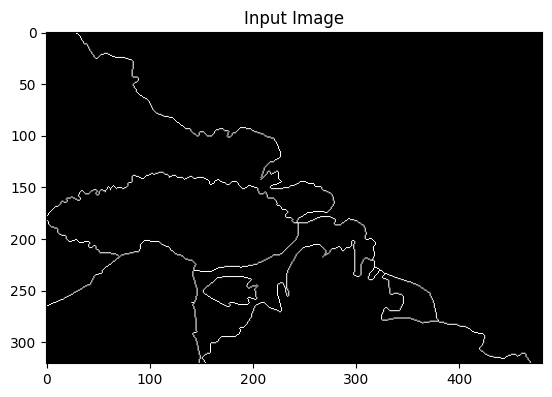

In [16]:
show_image(ground_truth_test_images[4])

In [12]:
cv_images = read_images_from_path(test_path)
sobel_cv_images = []
for cv_image in cv_images:
    cv_image = create_Mathematical_Morphology_for_image(cv_image)
    sobel_cv_images.append(create_sobel_filter_for_image(image=cv_image, x_kernel= 3, y_kernel=3, threshold_value=100))


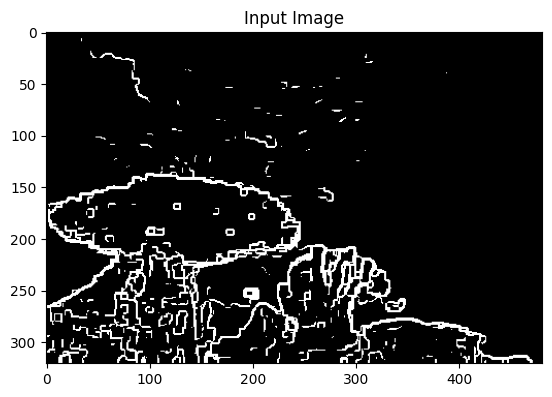

In [17]:
show_image(sobel_cv_images[4])

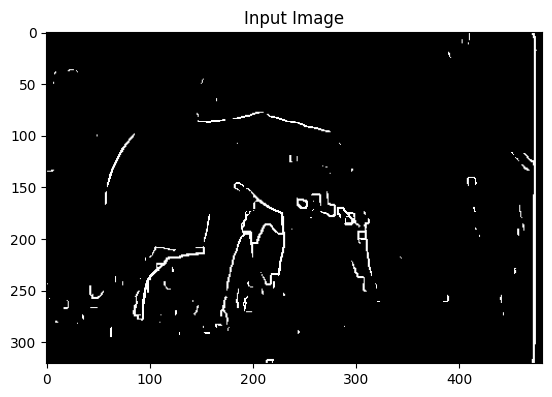

In [9]:
show_image(sobel_cv_images[15])

In [10]:
gt_data[0][0][0][0][0]

NameError: name 'gt_data' is not defined

In [ ]:
gt_data[0][0][0][0]

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [36, 36, 36, ..., 36, 36, 36],
       [36, 36, 36, ..., 36, 36, 36],
       [36, 36, 36, ..., 36, 36, 36]], dtype=uint16)

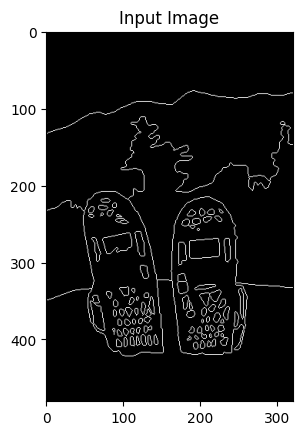

In [ ]:
edges = gt_data[0][0][0][1]
show_image(edges)

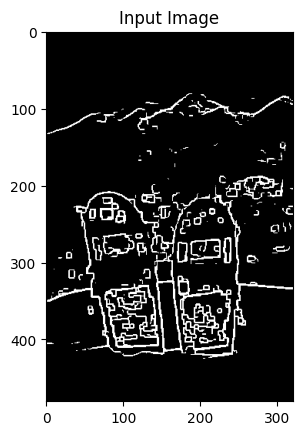

In [ ]:
gt_edges = sobel_cv_images[84]
show_image(gt_edges)

In [ ]:
import skimage.metrics
# Calculate evaluation metrics
mse = ((gt_edges - edges) ** 2).mean()
print("MSE:", mse)

MSE: 0.14294596537587193


In [ ]:
import cv2
import numpy as np

def evaluate_image(image, ground_truth, threshold):
  """Evaluates an image against a ground truth.

  Args:
    image: The image to evaluate.
    ground_truth: The ground truth for the image.
    threshold: The threshold value used for edge detection.

  Returns:
    A tuple of (accuracy, precision, recall, f1_score, threshold).
  """

  ground_truth_np = np.uint8(ground_truth)

  # Get the predictions from the thresholded image.
  _, predictions = cv2.connectedComponents(image)

  # Calculate the accuracy, precision, and recall.
  accuracy = np.sum(predictions == ground_truth_np) / predictions.size
  precision = np.sum(predictions == ground_truth_np) / np.sum(predictions)
  recall = np.sum(predictions == ground_truth_np) / np.sum(ground_truth_np)

  # Calculate the F1 score.
  f1_score = (2 * precision * recall) / (precision + recall)

  return accuracy, precision, recall, f1_score


In [ ]:
x = evaluate_image(gt_edges, edges,100)
x

(0.895020109973381,
 0.15218360881042134,
 27.13371293932849,
 0.30266964827400417)

In [ ]:
(2 * 0.19078104133470553 * 27.8816021990968) / (19078104133470553 + 27.8816021990968)

5.576320439819352e-16